In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas_datareader.data as web
import pandas as pd
import datetime as dt


In [2]:
df = pd.read_csv("/content/drive/MyDrive/UPM/Time Series/all_stocks_5yr.csv")

In [3]:
df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [4]:
df.shape

(619040, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [6]:
df_apple = df[df['Name'] == 'AAPL']

In [7]:
df_apple.shape

(1259, 7)

In [8]:
df_apple

,date,open,high,low,close,volume,Name
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...,...
2513,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL
2514,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL
2515,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL
2516,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,AAPL


In [9]:
df_apple.loc[:, 'ma20'] = df_apple.close.rolling(20).mean()
df_apple.loc[:, 'ma200'] = df_apple.close.rolling(200).mean()

In [10]:
df_apple.tail()

,date,open,high,low,close,volume,Name,ma20,ma200
2513,2018-02-01,167.165,168.62,166.7600,167.78,47230787,AAPL,173.8700,159.41200
2514,2018-02-02,166.000,166.80,160.1000,160.50,86593825,AAPL,173.2435,159.51110
2515,2018-02-05,159.100,163.88,156.0000,156.49,72738522,AAPL,172.3180,159.58135
2516,2018-02-06,154.830,163.72,154.0000,163.03,68243838,AAPL,171.7520,159.68515
2517,2018-02-07,163.085,163.40,159.0685,159.54,51608580,AAPL,171.0125,159.76465


In [11]:
df_apple = df_apple.sort_values('date', ascending = True).reset_index(drop=True)

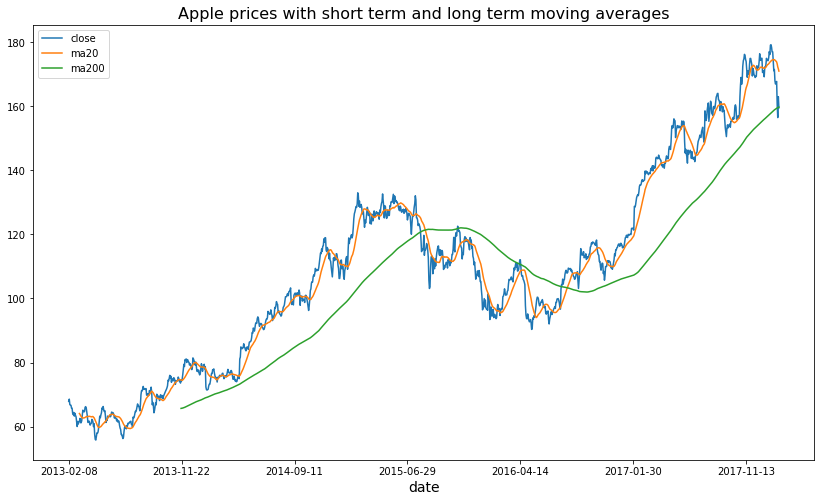

In [12]:
fig, ax = plt.subplots(figsize=(14, 8))
l = ax.get_xlabel()
ax.set_xlabel(l,fontsize=14)
ax.set_ylabel(l,fontsize=14)
plt.rcParams["axes.titlesize"] = 16
ax.set_title('Apple prices with short term and long term moving averages')
df_apple.plot(x="date", y=["close", "ma20", "ma200"], ax=ax)
plt.show()

In [13]:
!wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/libta-lib0_0.4.0-oneiric1_amd64.deb -qO libta.deb
!wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/ta-lib0-dev_0.4.0-oneiric1_amd64.deb -qO ta.deb
!dpkg -i libta.deb ta.deb
!pip install ta-lib

(Reading database ... 128302 files and directories currently installed.)
Preparing to unpack libta.deb ...
Unpacking libta-lib0 (0.4.0-oneiric1) over (0.4.0-oneiric1) ...
Preparing to unpack ta.deb ...
Unpacking ta-lib0-dev (0.4.0-oneiric1) over (0.4.0-oneiric1) ...
Setting up libta-lib0 (0.4.0-oneiric1) ...
Setting up ta-lib0-dev (0.4.0-oneiric1) ...
Processing triggers for man-db (2.9.1-1) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import talib

In [15]:
df_apple.loc[:, "rsi"] = talib.RSI(df_apple.close, 14)
df_apple.tail()

,date,open,high,low,close,volume,Name,ma20,ma200,rsi
1254,2018-02-01,167.165,168.62,166.7600,167.78,47230787,AAPL,173.8700,159.41200,35.765808
1255,2018-02-02,166.000,166.80,160.1000,160.50,86593825,AAPL,173.2435,159.51110,24.836304
1256,2018-02-05,159.100,163.88,156.0000,156.49,72738522,AAPL,172.3180,159.58135,21.025056
1257,2018-02-06,154.830,163.72,154.0000,163.03,68243838,AAPL,171.7520,159.68515,37.791716
1258,2018-02-07,163.085,163.40,159.0685,159.54,51608580,AAPL,171.0125,159.76465,33.682205


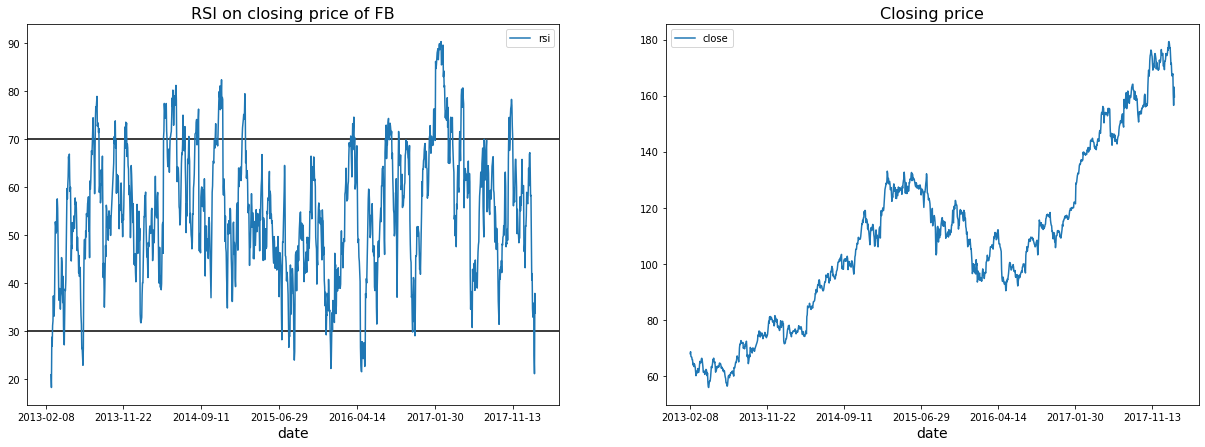

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(21, 7))
l0 = ax[0].get_xlabel()
ax[0].set_xlabel(l0,fontsize=14)
ax[0].set_ylabel(l0,fontsize=14)

l1 = ax[1].get_xlabel()
ax[1].set_xlabel(l1,fontsize=14)
ax[1].set_ylabel(l1,fontsize=14)


plt.rcParams["axes.titlesize"] = 16
ax[0].axhline(30, color="black")
ax[0].axhline(70, color="black")

ax[0].set_title("RSI on closing price of FB")
ax[1].set_title("Closing price")

df_apple.plot(x="date", y=["rsi"], ax=ax[0])
df_apple.plot(x="date", y=["close"], ax=ax[1])
plt.show()

In [17]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [18]:
df1 = df.copy()

In [19]:
df1.shape

(619040, 7)

In [20]:
df1.set_index('date', inplace=True)

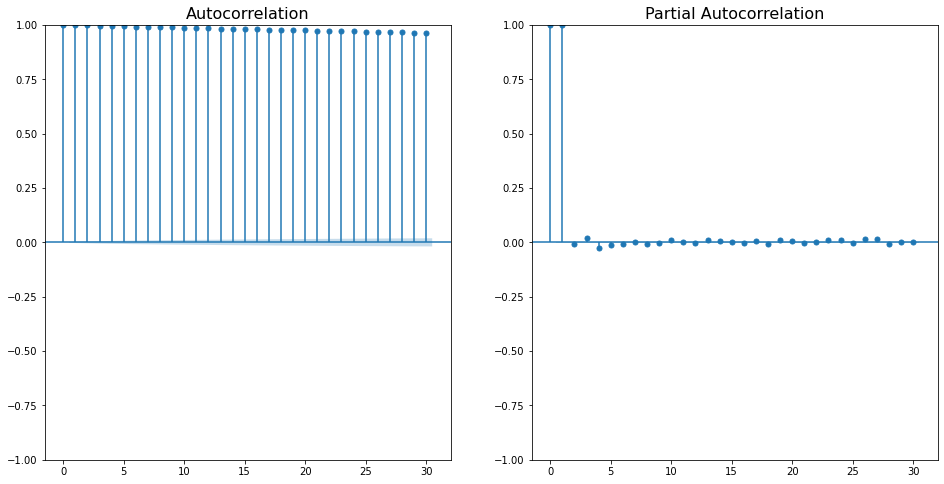

In [21]:

import statsmodels.api as sm

# Graph data
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

fig = sm.graphics.tsa.plot_acf(df1.iloc[1:]['close'], lags=30, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(df1.iloc[1:]['close'], lags=30, ax=axes[1])

In [22]:
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return pd.Series(diff)

In [23]:
df_diff =  difference(df1.close, 1)

<Axes: >

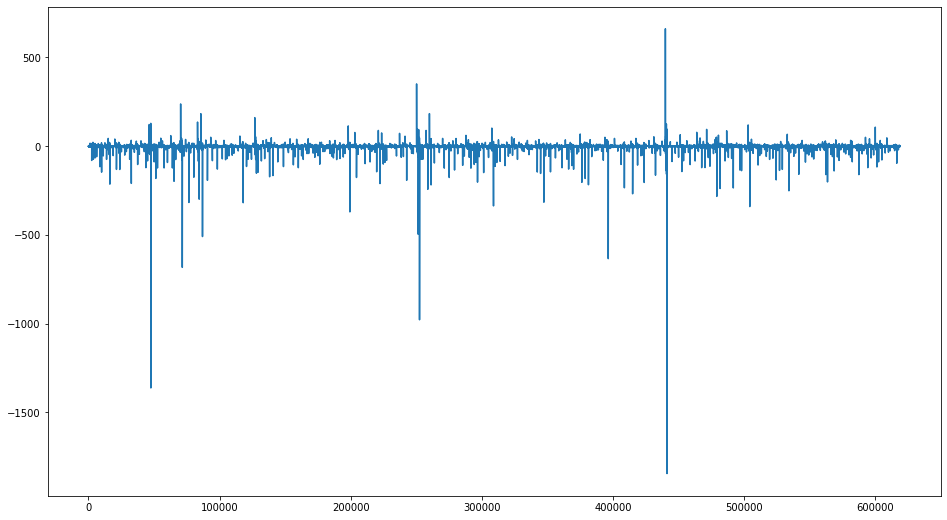

In [24]:
df_diff.plot(figsize=(16, 9))

In [25]:
df1 = df1.assign(y_log=np.log(df1.close))
df1.head()

,open,high,low,close,volume,Name,y_log
date,,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,2.691243
2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,2.671386
2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,2.658159
2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2.685123
2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,2.638343


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [31]:
scaled_df = df1.close.values.reshape(df1.close.shape[0], 1)
scaled_df = scaler.fit_transform(scaled_df)

In [32]:
def preprocess(df, look_back):
    X, y = [], []
    for i in range(look_back, len(df)):
        X.append(df[i-look_back:i,0])
        y.append(df[i,0])
    return np.array(X),np.array(y)

In [33]:
look_back = 60
X, y = preprocess(scaled_df, look_back)

In [34]:
X_train,X_test = X[:int(X.shape[0]*0.90)],X[int(X.shape[0]*0.90):]
y_train,y_test = y[:int(y.shape[0]*0.90)],y[int(y.shape[0]*0.90):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

557082
61898
557082
61898


In [35]:
from keras import callbacks
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [36]:
#Build the model
model1 = Sequential()
model1.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
model1.add(Dense(1))
model1.compile(optimizer='adam',loss='mse')

model1.summary()
     

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [37]:
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))

In [39]:
history1 = model1.fit(X_train,y_train,epochs=10, validation_data=(X_test,y_test),shuffle=False)

Epoch 1/10
17409/17409 [==============================] - 117s 7ms/step - loss: 2.8742e-05 - val_loss: 3.6577e-06
Epoch 2/10
17409/17409 [==============================] - 115s 7ms/step - loss: 1.1949e-05 - val_loss: 3.3349e-06
Epoch 3/10
17409/17409 [==============================] - 111s 6ms/step - loss: 1.0079e-05 - val_loss: 2.9790e-06
Epoch 4/10
17409/17409 [==============================] - 109s 6ms/step - loss: 9.5672e-06 - val_loss: 2.6842e-06
Epoch 5/10
17409/17409 [==============================] - 110s 6ms/step - loss: 9.3840e-06 - val_loss: 2.4807e-06
Epoch 6/10
17409/17409 [==============================] - 106s 6ms/step - loss: 9.3501e-06 - val_loss: 2.3204e-06
Epoch 7/10
17409/17409 [==============================] - 104s 6ms/step - loss: 9.4103e-06 - val_loss: 2.1712e-06
Epoch 8/10
17409/17409 [==============================] - 109s 6ms/step - loss: 9.4797e-06 - val_loss: 2.0777e-06
Epoch 9/10
17409/17409 [==============================] - 108s 6ms/step - loss: 9.4568e-

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'validation'])  # add legend labels for 'train' and 'validation'
plt.show()

1935/1935 [==============================] - 5s 2ms/step


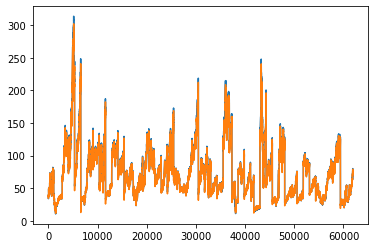

In [41]:
Xt = model1.predict(X_test)
plt.plot(scaler.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scaler.inverse_transform(Xt))

In [ ]:
act = []
pred = []
for i in range(X_test.shape[0]):
  # i=274
  Xt = model1.predict(X_test[i].reshape(1, 60,1))
  # print('predicted:{0}, actual:{1}'.format(scaler.inverse_transform(Xt),scaler.inverse_transform(y_test[i].reshape(-1,1))))
  pred.append(scaler.inverse_transform(Xt))
  act.append(scaler.inverse_transform(y_test[i].reshape(-1,1)))